<h1><center>Laboratorio 10: Interpretabilidad 🤖</center></h1>

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesor: Pablo Badilla y Ignacio Meza D.
- Auxiliar: Sebastián Tinoco
- Ayudante: Felipe Arias y Diego Cortez

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Gabriela Mora

### **Link de repositorio de GitHub:** `https://github.com/RaulSilvaA/MDS7202-mora-silva/blob/lab10/lab10/Gabriela_Mora_Lab.ipynb`

### Indice

1. [Temas a tratar](#Temas-a-tratar:)
3. [Descripcción del laboratorio](#Descripción-del-laboratorio.)
4. [Desarrollo](#Desarrollo)

## Temas a tratar

- Clasificación usando `XGBoost`.
- Métodos Agnósticos Globales de Interpretabilidad (`Partial Dependence Plot`, `Permutation Feature Importance`)
- Métodos Agnósticos Locales de Interpretabilidad (`Scoped Rules`, `SHAP`)

## Reglas:

- **Grupos de 2 personas**
- Asistencia **obligatoria** a instrucciones del lab (viernes 16.15). Luego, pueden quedarse trabajando en las salas o irse.
- **No se revisarán entregas de personas ausentes**.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Prohibidas las copias.
- Pueden usar cualquer matrial del curso que estimen conveniente.

### Objetivos principales del laboratorio

- Generar un pipeline de clasificación con `XGBoost`.
- Implementar modelos de interpretabilidad para explicar el funcionamiento del modelo de clasificación.

El laboratorio deberá ser desarrollado sin el uso indiscriminado de iteradores nativos de python (aka "for", "while"). La idea es que aprendan a exprimir al máximo las funciones optimizadas que nos entrega `pandas`, las cuales vale mencionar, son bastante más eficientes que los iteradores nativos sobre DataFrames.

# 1. Problemas Clínicos del Dr. Simi

<p align="center">
  <img src="https://gantz.cl/wp-content/uploads/2020/01/79024136_2718114448239059_7240913062570491904_o.jpg" width="350">
</p>

El reconocido **Dr. Simi**, famoso vendedor de medicamentos en latinoamerica, debido a la creciente prevalencia de enfermedades crónicas, como la diabetes, decidió abrir una clínica especializada en el tratamiento de esta enfermedad en nuestro país.

La clínica del Doctor Simi se convirtió en un lugar donde los pacientes con diabetes podrían recibir atención médica integral. El personal médico estaba compuesto por especialistas en endocrinología, nutrición y enfermería, todos capacitados en el manejo de la diabetes.

Sin embargo él se ha dado cuenta que los tiempos han cambiado y gracias a las tecnologías es posible generar mejores predicciones en la diabetes conociendo el historial médico de las personas. Por esto, el doctor se ha colocado una meta de incluir modelos de machine learning dentro de sus clínicas, para ello le ha solicitado crear un modelo capaz de predecir/clasificar diabetes pero le rogó que el desarrollo del modelo tuviera un especial enfoque en la interpretabilidad de lo que hace su modelo.

Para que usted pueda entrenar el modelo, Dr. Simi le ha entregado un dataset de todos los clientes que fueron detectados con diabetes a lo largo de la historia de la clinica. Con ello, adjunta el historial médico de las personas en forma de datos tabulares para que usted pueda realizar fácilmente la clasificación.


In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/lab_progra/diabetes_data.csv')
df.head(4)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0


## 2. Clasificación de pacientes con diabetes (0.5 pt)

<p align="center">
  <img src="https://media.tenor.com/QH--g3ZaSbsAAAAC/dr-simi-abrazo.gif" width="400">
</p>

En primer lugar, el reconocido doctor le pide entrenar un modelo de `XGBoost` utilizando como target la columna `Diabetes` del dataset `diabetes_data.csv`. Para el entrenamiento tome en cuenta **todos** los pasos necesarios para entrenar un modelo de aprendizaje supervisado vistos hasta la fecha (use `Pipeline`, `ColumnTransformer`, etc.), comente sus decisiones y los resultados obtenidos con el modelo. ¿Es acaso un buen predictor de diabetes?, ¿Qué buscan explicar las métricas utilizadas?, ¿las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo una buena elección de las features?.

In [ ]:
!pip install xgboost

Primero se verá el tipo de variable de los datos para saber cuál columntransform usar en cada variable

In [ ]:
# Inserte su código aquí
!pip install ydata_profiling
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="EDA")
profile.to_file("eda.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, PowerTransformer
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [ ]:
variables_numericas=['Age',
                     'BMI',
                     'MentHlth',
                     'PhysHlth',
                     'GenHlth'
]
variables_binarias=[
                       'Sex',
                      'HighChol',
                      'CholCheck',
                       'Smoker',
                       'HeartDiseaseorAttack',
                       'PhysActivity',
                       'Fruits',
                       'Veggies',
                       'HvyAlcoholConsump',
                       'DiffWalk',
                       'Stroke',
                       'HighBP'
]

In [ ]:
numerical_transformer = StandardScaler()

In [ ]:
#Realizamos One Hot Encoder a las variablees ordinales
column_transformer = ColumnTransformer(
    transformers=[
      ('num_transform',numerical_transformer, variables_numericas)
    ],
    remainder='passthrough'
)

In [ ]:
clf = Pipeline([
    ('prepr', column_transformer),
    ('clasificador', xgb.XGBClassifier())
])

X = df.drop(['Diabetes'], axis=1)
y = df['Diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=190423)

In [ ]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [ ]:
#reportamos resultados
report = classification_report(y_test, y_pred)

In [ ]:
print(report)

              precision    recall  f1-score   support

         0.0       0.78      0.70      0.74      7157
         1.0       0.72      0.79      0.76      6982

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139



 **Comente sus decisiones y los resultados obtenidos con el modelo.**

 Las decisiones que se tomaron en la construcción del modelo fueron la cantidad de muestra para entrenar y testear y además, las transformaciones a las columnas. La cantidad de muestra se eligió porque es la que usualmente se acostumbra a usar para entrenar modelos y la de transformación de las variables, en las númericas se decidió usar el standar scaler porque las distribuciones de las variables numéricas eran parecidas a distribuciones normales y en las categóricas, se decidió usar el one hot encoding debido a que son variables sin orden.



**¿Es acaso un buen predictor de diabetes?**

Se puede observar que el desempeño del modelo es ligeramente bueno si es que nos fijamos en el el f1-score que es finalmente una ponderación del recall y el precision. Pero dado la importancia de diagnosticar perfectamente a los pacientes, el resultado resulta ser mediocre debido a que los costos de predecir mal a un paciente que podría tener diabetes en el futuro causaría muchos daños a futuro, como que el paciente se relajara con las restricciones que ayuadrían a no padecer la enfermedad provocando que ella aparezca prematuramente.
  
**¿Qué buscan explicar las métricas utilizadas?**

Las métricas que se utilizan normalmente en los modelos de ML buscan explicar la capaciadd que tienen el modelo de predecir cierto tipo de predicción.

  
**¿Las métricas utilizadas para medir la predictibilidad le permiten asegurar que su modelo una buena elección de las features?**

No, el modelo sólo clasifica. De la forma en que está configurado, no podemos saber a partir de cuáles variables se fijó para clasificar.

## 3. Importancia de las features con XGBoost (0.5 pt)

<p align="center">
  <img src="https://media.tenor.com/5JAj5_IiagEAAAAd/dr-simi-dr-simi-dance.gif" width="400">
</p>

Para añadir el toque de interpretabilidad que Dr. Simi le pide, se le pide calcular la **importancia de las features** del modelo entrenado utilizando todos los métodos (*weight*, *cover*, *gain*) que posee xgboost usando `plot_importance`. ¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados. Finalmente, ¿las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles? ¿Qué debilidad presenta este método?

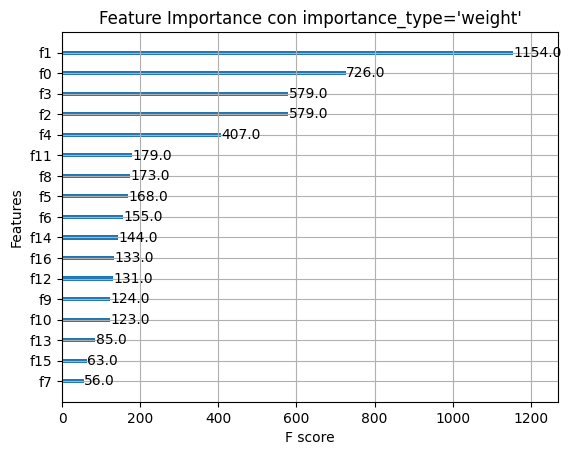

In [ ]:
# Inserte su código aquí
xgb.plot_importance(clf[1], max_num_features=20)
plt.title("Feature Importance con importance_type='weight'")
plt.show()

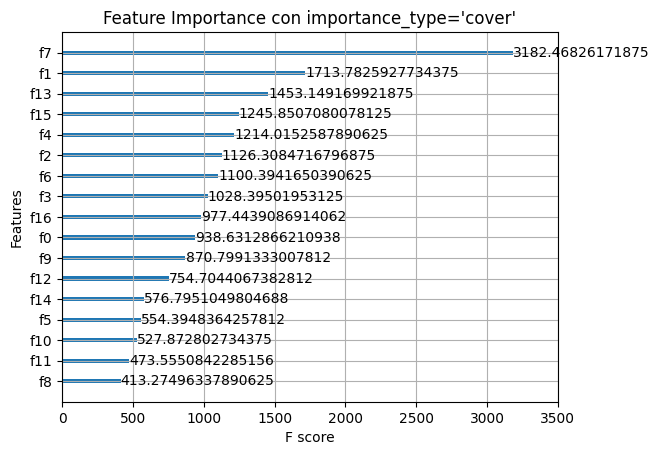

In [ ]:
xgb.plot_importance(clf[1], max_num_features=20, importance_type="cover")
plt.title("Feature Importance con importance_type='cover'")
plt.show()

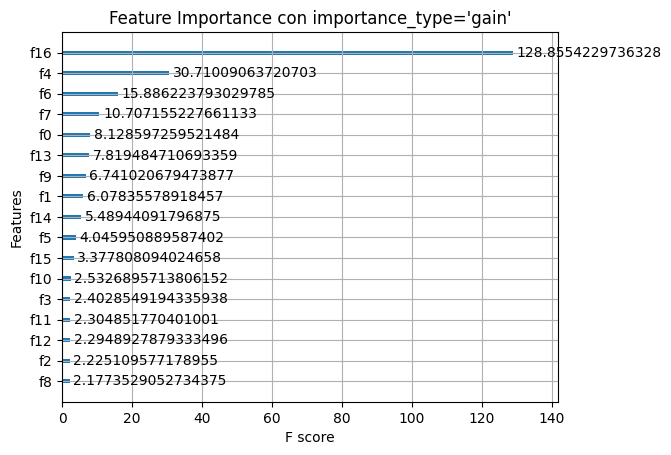

In [ ]:
xgb.plot_importance(clf[1], max_num_features=20, importance_type="gain")
plt.title("Feature Importance con importance_type='gain'")
plt.show()

**¿Los resultados obtenidos con los diferentes métodos son compatibles?, comente sus resultados y a que se debe la igualdad o desigualdad que ve en los resultados**


Los resultados obtenidos en los tres métodos no son compatibles debido a las diferencias en los rankings de importancia que presentan entre sí. Sin embargo, estas discrepancias se deben a los diferentes puntos de comparación utilizados por cada uno de los tres métodos.

Estos tres métodos difieren en la forma en que calculan la importancia de una característica. El método "weight" considera la frecuencia con la que una característica aparece en los árboles del modelo para evaluar su importancia. Mientras tanto, el método "cover" se basa en la cobertura promedio que una característica proporciona al dividir los nodos de los árboles para determinar su importancia. Por último, el método "gain" establece la importancia de una característica en función de la ganancia promedio obtenida al dividir los nodos de los árboles utilizando dicha característica.


**¿Las importancias obtenidas son suficientes para obtener la interpretabilidad de un modelo que utiliza árboles?**

La interpretabilidad abarca muchas aristas que estos métodos no pueden abarcar por sí solas. Pueden ser de gran ayuda para dar apoyo de decisiones y darle una línea conductora a lo que se entiende del modelo pero no son suficientes.

**¿Qué debilidad presenta este método?**

Sólo considera la importancia de als variables en el modelo, pero no es capaz de ponderar las colinealidades que pueden haber entre las variables, que obviamente, afectan al modelo.




## 4. Métodos Agnósticos Globales (1 pt)

<p align="center">
  <img src="https://media.tenor.com/JcRHtjVuXN8AAAAC/dr-simi-farmacias-similares.gif" width="400">
</p>

Para mitigar los problemas encontrados en la sección anterior, Dr. Simi le pide implementar un **método de permutación** que le permita observar la importancia de las features. Visualice los resultados de este método en un gráfico. Para que su modelo sea consistente, repita el proceso **30 veces** y verifique la desviación estándar de sus resultados (¿Qué señala está?). Además, responda las siguientes preguntas:


- ¿Cómo mide la importancia de las features su propuesta?
- ¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿Tienen sentido?
- ¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?
- Nombre y explique 3 ventajas y 3 desventajas del método implementado.

In [ ]:
# Inserte su código aquí
from sklearn.inspection import permutation_importance
import numpy as np

In [ ]:
result = permutation_importance(clf, X_test, y_test, n_repeats=30, random_state=42)

In [ ]:
result

{'importances_mean': array([0.02592121, 0.00250371, 0.010873  , 0.00317561, 0.03142608,
        0.00024047, 0.00335007, 0.00096895, 0.00126836, 0.00160549,
        0.0049532 , 0.05884433, 0.00191433, 0.00260037, 0.0026711 ,
        0.00147818, 0.01729024]),
 'importances_std': array([0.00224168, 0.00098114, 0.00122542, 0.00077764, 0.00167023,
        0.00076798, 0.00100794, 0.00082766, 0.00087958, 0.00067398,
        0.00077164, 0.00240892, 0.0010802 , 0.00116855, 0.00109518,
        0.0005588 , 0.00193819]),
 'importances': array([[ 2.49664050e-02,  2.68760167e-02,  2.48956786e-02,
          2.45420468e-02,  2.85734493e-02,  2.68052903e-02,
          2.24909824e-02,  3.01294292e-02,  2.53907631e-02,
          2.60980267e-02,  2.70174694e-02,  2.51785841e-02,
          2.75125539e-02,  2.21373506e-02,  2.75832803e-02,
          2.75125539e-02,  2.83612702e-02,  2.55322159e-02,
          2.48956786e-02,  2.39762359e-02,  2.22080770e-02,
          2.39762359e-02,  2.54614895e-02,  2.5320

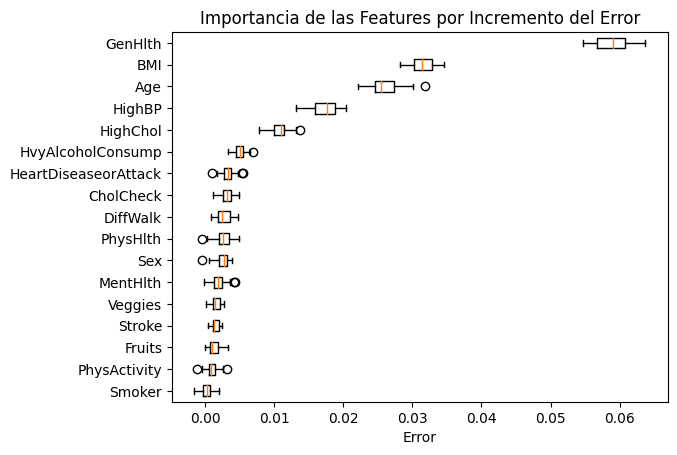

In [ ]:
perm_sorted_idx = result.importances_mean.argsort()
plt.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=np.array(df.columns)[perm_sorted_idx],
)
plt.title("Importancia de las Features por Incremento del Error")
plt.xlabel('Error')
plt.show()

**¿Cómo mide la importancia de las features su propuesta?**
El método de permutation importance mide la importancia de las características al evaluar cómo afecta la permutación aleatoria de los valores de una característica específica a la precisión o rendimiento del modelo. Se entrena el modelo y se calcula una métrica de evaluación en un conjunto de prueba original. Luego, se permuta aleatoriamente una característica y se calcula nuevamente la métrica de evaluación. La importancia de la característica se determina por la diferencia entre la métrica original y la métrica permutada. Las características que causan una mayor disminución en la métrica se consideran más importantes para el modelo.


**¿Qué features tienen un mayor impacto en la salida del modelo?. Comente las 5 primeras, ¿Tienen sentido?**

Las variables que tienen una mayor importancia son GenHlth, BMI, Age, HighBP y  HighChol. EStas variables tienen sentido porque todas ellas a exepción de la edas son indicadores de cómo está la salud en general de la persona. La variable de la edad está correlacionada con la enfermedad de la diabetes porque en general, la edad es la variable que da matoy riesgo a todas las enfermedades a medida de que la persona envejece.


**¿Cómo cambian sus conclusiones con respecto a las features importances del punto anterior?**

Las conclusiones obviamente cambian porque la forma de calcular la importancia difiere de las otras 3. Esta se basa en las métricas de desempeño de las variables y las otras 3 tienen que ver con cosas propias de la construcción del modelo


**Nombre y explique 3 ventajas y 3 desventajas del método implementado.**

Ventajas del modelo de Permutation Importance:

Independencia del algoritmo: El método de Permutation Importance se basa en la permutación de características, lo que permite su aplicación en diversos algoritmos de aprendizaje automático. No está limitado a un algoritmo específico, lo que lo hace flexible y aplicable en diferentes contextos.

Interpretación intuitiva: La importancia por permutación proporciona una medida intuitiva y fácil de interpretar sobre el impacto de cada característica en el rendimiento del modelo. Los resultados muestran directamente qué características tienen un efecto más significativo y cuáles tienen menos relevancia.

Robustez ante correlaciones: El método de Permutation Importance es menos sensible a la presencia de características correlacionadas en comparación con otros enfoques de importancia de características. Al permutar los valores de una característica específica, se evalúa su impacto independientemente de otras características, evitando sesgos causados por la correlación.

Desventajas del modelo de Permutation Importance:

Cálculos computacionalmente costosos: El cálculo de la importancia por permutación puede ser computacionalmente costoso, especialmente para conjuntos de datos grandes o modelos complejos. Requiere repetir el proceso de permutación para cada característica, lo que puede llevar tiempo en situaciones con recursos limitados.

Estimación precisa de importancia: La precisión de las estimaciones de importancia por permutación depende del tamaño del conjunto de datos y del número de permutaciones realizadas. Con conjuntos de datos pequeños o un número insuficiente de permutaciones, las estimaciones pueden no ser completamente precisas y pueden variar.

Limitaciones en características categóricas y datos faltantes: El método de Permutation Importance puede tener dificultades al lidiar con características categóricas o con datos faltantes. El tratamiento adecuado de estas características requiere consideraciones adicionales y puede afectar la interpretación de la importancia de las características obtenidas.

## 5. Métodos Agnósticos Locales (2 pt)

<p align="center">
  <img src="https://i.makeagif.com/media/1-27-2017/fBrzT8.mp4" width="400">
</p>

### Debido a algunos problemas producidos porque el pipe line afectaba el shap_value, se consideró ocupar el modelo sin él. No pude identificar bien el error

### Parte A (0.4 pt)

Alegre por saber cómo funciona el modelo de predicción a nivel general, Dr. Simi le pide ahora interpretar las predicciones de su modelo a nivel de paciente (es decir, desde un punto de vista **local**). Para esto, el ilustre farmacéutico le pide calcular los *shap values* de su modelo. ¿Qué representa cada número en su resultado? ¿Es posible atribuir un significado a la positividad/negatividad de cada valor?

In [ ]:
!pip install shap

In [ ]:
import warnings
warnings.filterwarnings("ignore", message=".*The 'nopython' keyword.*")

In [ ]:
import shap

In [ ]:
explainer = shap.TreeExplainer(clf[1])
shap_values = explainer(X)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [ ]:
shap_values

.values =
array([[ 0.25068817,  0.7646566 ,  0.06424825, ..., -0.14401539,
        -0.01964087,  0.27004784],
       [ 0.1672756 ,  0.5072161 ,  0.2881737 , ..., -0.04578878,
         0.00145723,  0.45473376],
       [ 0.5425405 ,  0.86235744,  0.02811277, ..., -0.00183527,
        -0.02624307, -0.2548808 ],
       ...,
       [ 0.26566067, -0.00349831,  0.53292525, ...,  0.23433568,
        -0.02478586,  0.61009526],
       [ 0.03212281, -0.10917474,  0.10988953, ...,  0.09761357,
        -0.03257698,  0.582024  ],
       [ 0.14022927, -0.10665116,  0.1891844 , ..., -0.0634148 ,
        -0.00334176,  0.40631115]], dtype=float32)

.base_values =
array([-0.00131748, -0.00131748, -0.00131748, ..., -0.00131748,
       -0.00131748, -0.00131748], dtype=float32)

.data =
array([[ 4.,  1.,  0., ...,  0.,  0.,  1.],
       [12.,  1.,  1., ...,  0.,  1.,  1.],
       [13.,  1.,  0., ...,  0.,  0.,  0.],
       ...,
       [13.,  0.,  1., ...,  1.,  0.,  1.],
       [11.,  0.,  1., ...,  1.,  0.

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


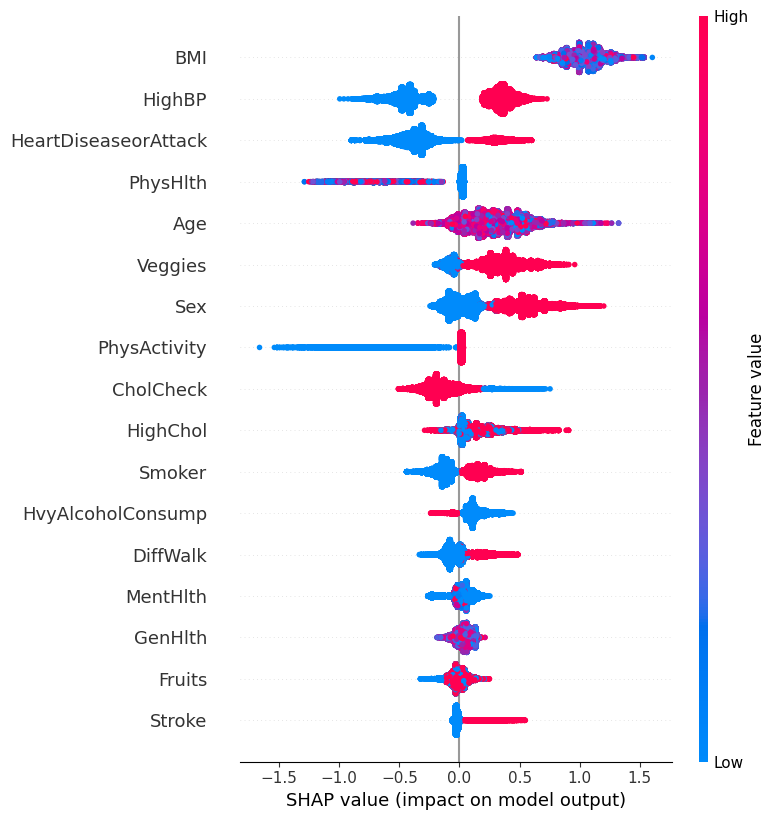

In [ ]:
shap.summary_plot(shap_values, X)

**¿Qué representa cada número en su resultado?**

El gráfico de SHAP muestra cómo las características contribuyen a las predicciones del modelo. Las instancias se ubican en el eje horizontal, desde valores negativos a positivos. Las características con contribuciones negativas se sitúan a la izquierda, mientras que las positivas están a la derecha.

Las barras verticales representan la distribución de los valores SHAP para cada característica. La longitud de la barra indica la magnitud de los valores SHAP, y el color refleja el valor de la característica para cada instancia. Las características con mayor dispersión y barras más largas tienen un mayor impacto en las predicciones.

**¿Es posible atribuir un significado a la positividad/negatividad de cada valor?**

Es posible, el significadi radica en en la contribución negativa o positiva de predecir si el paciente tendrá diabetes en ekl futuro o no.


### Parte B (0.4 pt)

Usando los *shap values* calculados, grafique el **aporte** de las diferentes variables para las instancias **1**, **9** y **150**, interprete sus resultados y responda:
- ¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes?
- ¿Existe algún patrón común entre las instancias analizadas?
- ¿Es posible generalizar estas conclusiones a todo el dataset?

In [ ]:
!pip install --upgrade shap

In [ ]:
# Inserte código para generar gráficos de aporte local aquí
# Obtener el valor de SHAP para las instancias deseadas
shap_1 = explainer.shap_values(X)[1]
shap_9 = explainer.shap_values(X)[9]
shap_150 = explainer.shap_values(X)[150]

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [ ]:
shap.initjs()


# Utiliza shap.force_plot() con la fila específica
shap.force_plot(explainer.expected_value, shap_1, feature_names)


In [ ]:
shap.initjs()

# Utiliza shap.force_plot() con la fila específica
shap.force_plot(explainer.expected_value, shap_9, feature_names)


In [ ]:
shap.initjs()

# Utiliza shap.force_plot() con la fila específica
shap.force_plot(explainer.expected_value, shap_150, feature_names)


**¿Qué variables afectan de manera positiva/negativa a la probabilidad de poseer diabetes?**

Las variables que afectan positivamente y negativamente a cada infividuo es distinta. Para especificar más sus variaciones se debe considerar que las flechas que están hacia la derecha representan un aporte positivo, y las flechas que están hacia la izquierda representan un aporte negativo.

**¿Existe algún patrón común entre las instancias analizadas?**

La variable BMI afecta negativamente a todos los individuos y ka variable GebHelth_2 también afecta positivamente a los 3 individuos.


**¿Es posible generalizar estas conclusiones a todo el dataset?**

No, debido a que se está inspeccionando una muestra bastante pequeña de individuos

### Parte C (0.4 pt)

Genere ahora una visualización donde se grafique el aporte de cada feature a nivel **global** e interprete sus resultados. ¿Qué diferencias existen con las conclusiones generadas a nivel de instancia?

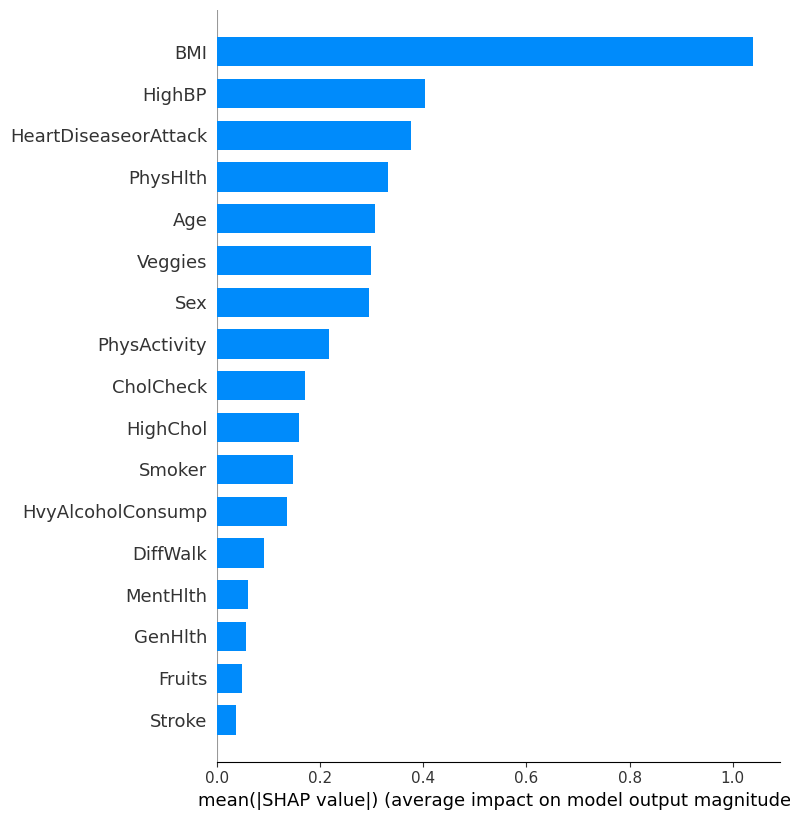

In [ ]:
# Inserte código para generar gráficos de aporte global aquí
shap.summary_plot(shap_values, X, plot_type="bar", feature_names=feature_names)

**¿Qué diferencias existen con las conclusiones generadas a nivel de instancia**
Las diferencias se pueden observar tanto en rnaking de importancia de variables como también de la visualización del aporte debido a que está representado como el módulo de la variable. Dicho esto, la similitud que se puede observar es que las variables con más importancia, en este caso las primeras 3, están presentes a nivel individual de los individuos inspeccionados. Sin embargo, para las siguientes variables a nivel global esto no se repite en los individuos.

### Parte D (0.4 pt)

Grafique ahora un *scatterplot* entre los *shap values* y las primeras 5 features con mayor impacto global (un gráfico por cada feature), coloreando cada punto por la probabilidad de tener diabetes. ¿Qué puede concluir de sus resultados?

In [ ]:
# obtenemos los shap values
shap_values_abs = np.mean(np.abs(shap_values.values), axis=0)

# Obtenemos los nombres ordenados de mayor a menor
feature_importance_names = X_train.columns[shap_values_abs.argsort()[::-1]]

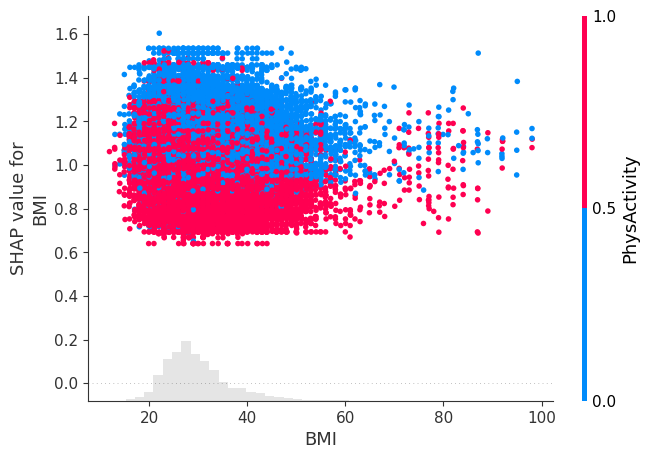

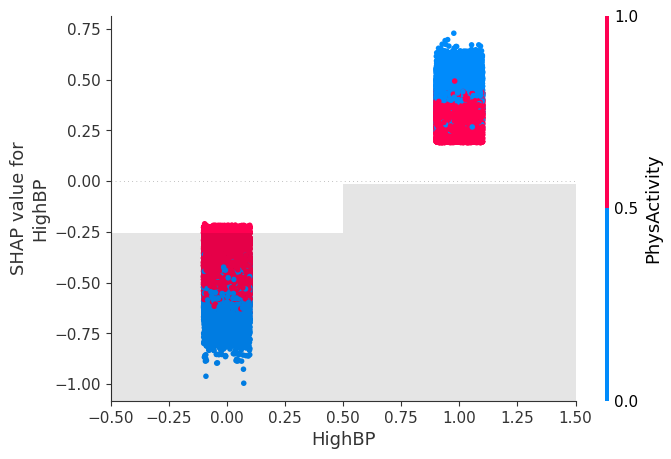

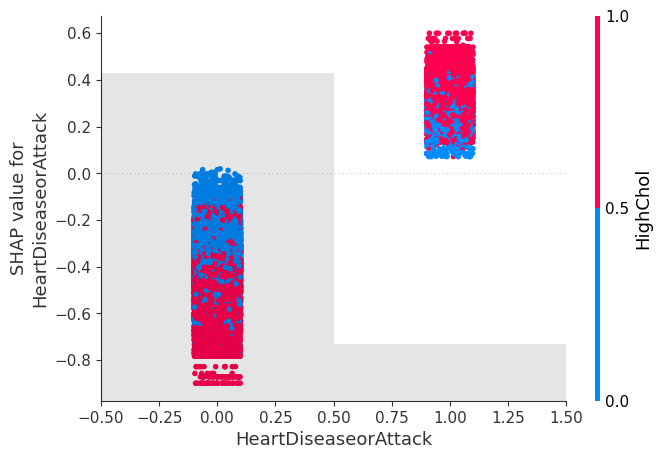

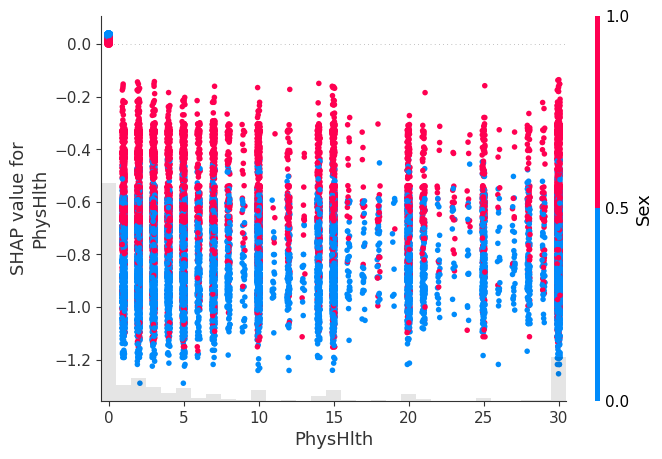

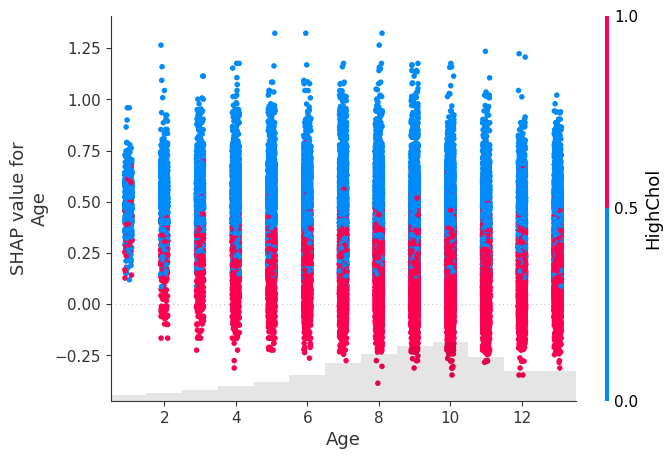

In [ ]:
for name in feature_importance_names[:5]:
    #shap.dependence_plot(name, shap_values.values, X)
    shap.plots.scatter(shap_values[:,name],
                   color=shap_values)

**¿Qué puede concluir de sus resultados?**
Por orden, no se puede concluir que a mayor BMI se correlacione con tener diabetes, en highpb se puede observar que cuando el valor es 0 hay mayor cantidad de personas con diabetes, pero con valor 1 eso se invierte. En la variable de ataque cardiaco, no haberlo tenido no presenta alguna correlacion con tenerlo o no, pero sí haberlo tenido si presenta una correlacion con tener diabetes. En cuanto a la variable de salud física, se tiende a ver que mientras mayor es el numero de esa variable, se tiende a presentar menos la diabetes y cuando el valor es menor es lo inverso. Por último, en la edad se puede observar que cndo eres más joven es poco probable que se presente la diabetes, pero esto no se presenta cuando la edad es mayor.

### Parte E (0.4 pt)

Finalmente, se le pide generar un gráfico del tipo **Partial Dependence Plot** para las mismas 5 variables con mayor impacto global usando una submuestra de **1000 observaciones**. ¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? ¿Son estas conclusiones generalizables para todo el conjunto de datos?

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


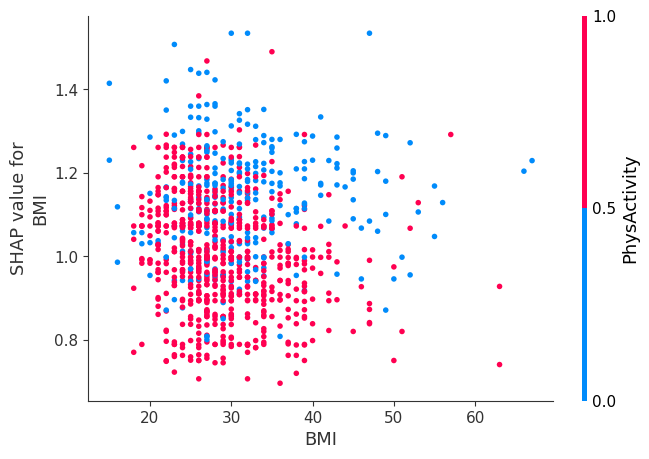

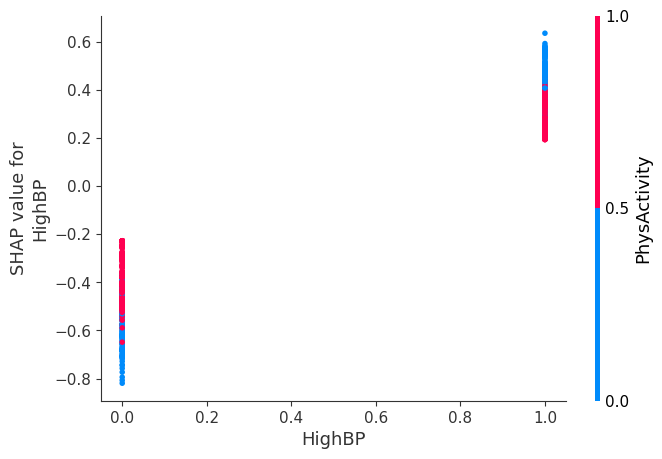

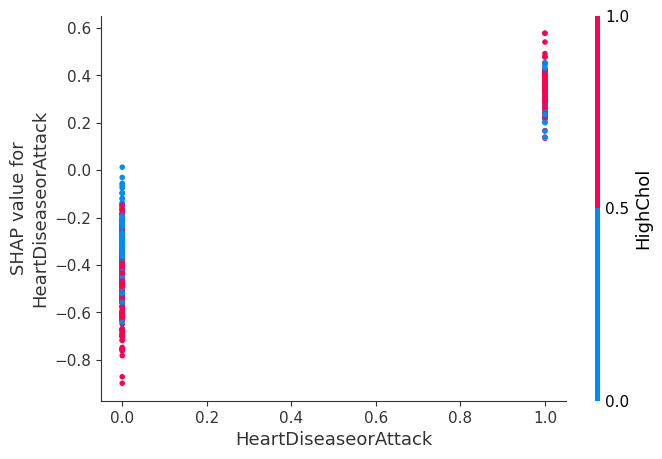

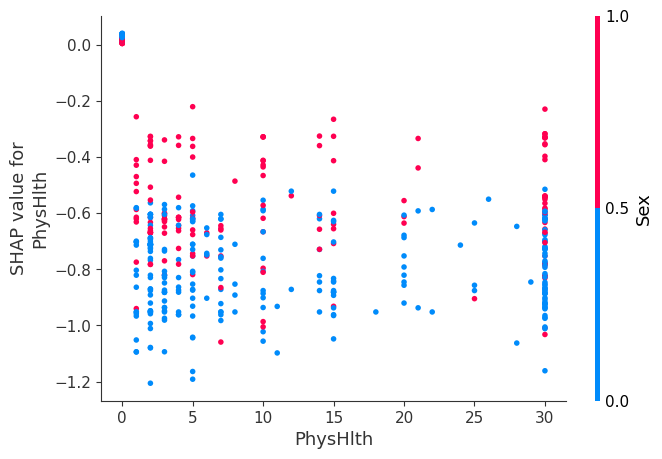

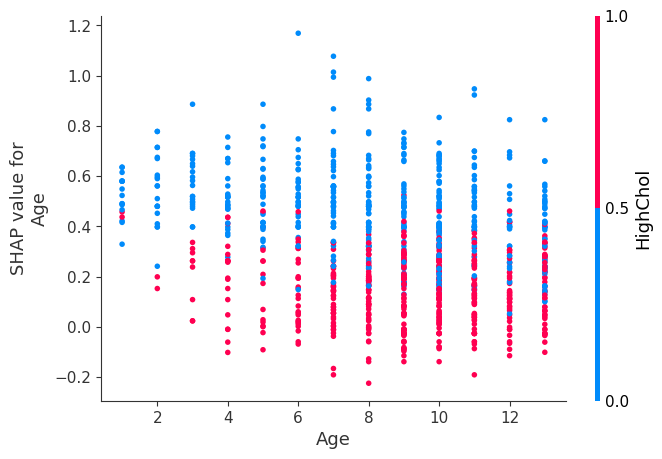

In [ ]:
import shap
import numpy as np
import matplotlib.pyplot as plt

# Obtener de 1000 y elección de los 5 más importantes
random_1000 = np.random.choice(X_train.index, size=1000, replace=False)
muestreo = X_train.loc[random_1000]
mas_imp = feature_importance_names[:5]

# Calcular los valores de SHAP para la submuestra
explainer = shap.TreeExplainer(clf[1])
shap_values_muestreo = explainer.shap_values(muestreo, check_additivity=False)

# Crear el gráfico para cada variable
for feature_name in mas_imp:
    shap.dependence_plot(feature_name, shap_values_muestreo, muestreo, show=False)

plt.show()

**¿Qué relación existe entre la salida promedio del modelo y cada feature analizada? **

No se observa una relacion clara con BMI, en highbo, se puede observar que cuando no se tiene esto, se presentan más casos donde hay diabetes y cuando se presenta, no hay una relacion clara en esto. En la variable de ataque cardiaco, no hay una relación clara con la diabetes cuando no se presenta uno, pero cuando se presenta, se observan más casos de diabetes. Para salud fisica, se ibserva que cuando es alta, no se presentan tantos casos de diabetes, pero cuando esta no es así, la relación no es clara. Por último en la edad, se obversa que cuando se es joven, no se presentan muchos casos con diabetes, pero cuando aumenta la edad, esta relación no es clara.

**¿Son estas conclusiones generalizables para todo el conjunto de datos?**

Debido a la aleatoriedad y muestra realtivamnete grande, los resultados se podrían extrapolar para toda la data.

## 6. Sistema de Reglas! (1 pt)

<p align="center">
  <img src="https://media.baamboozle.com/uploads/images/125978/1638281150_1380186_gif-url.gif" width="400">
</p>

Después de todo el trabajo hecho, Dr. Simi le pide simplificar el funcionamiento de su modelo en un sistema de reglas que le permita explicar a sus clientes las predicciones que genera su modelo. En particular, Dr. Simi le pide explicar la decisión tomada para las observaciones **1000**, **3001** y **5751**. Con las reglas propuestas señale a **cuánta población** es posible explicar con estas reglas e indique la **precisión** que poseen las reglas en la totalidad de los datos. ¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.

In [ ]:
df.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Stroke', 'HighBP', 'Diabetes'],
      dtype='object')

In [ ]:
from alibi.explainers import AnchorTabular

In [ ]:
# Inserte su código para generar sistema de reglas aquí
X.columns = [str(column) for column in X.columns]
predict_fn = lambda x: clf[1].predict(x)
explainer = AnchorTabular(predict_fn, X.columns, seed=1)
explainer.fit(X_train.to_numpy())

class_names = ["Sano", "Diabetico"]
explanation = explainer.explain(X_test.to_numpy()[idx], threshold=0.95)

idx = 1000
# explicar predicción idx 1000
print('### 1000 ###')
print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)

# Índice de la observación a explicar
idx = 3001
# Explicar la predicción para la observación en el índice dado
print(' ')
print('### 3001 ###')
explanation = explainer.explain(X_test.to_numpy()[idx], threshold=0.95)
print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)

idx = 5751
# explicar predicción idx 5751
print(' ')
print('### 5751 ###')
explanation = explainer.explain(X_test.to_numpy()[idx], threshold=0.95)
print('Prediction: ', class_names[explainer.predictor(X_test.to_numpy()[idx].reshape(1, -1))[0]])
print('Anchor: %s' % (' AND '.join(explanation.anchor)))
print('Precision: %.2f' % explanation.precision)
print('Coverage: %.2f' % explanation.coverage)

### 1000 ###
Prediction:  Diabetico
Anchor: Sex > 0.00
Precision: 0.99
Coverage: 0.46
 
### 3001 ###
Prediction:  Diabetico
Anchor: PhysHlth <= 0.00
Precision: 0.97
Coverage: 0.56
 
### 5751 ###
Prediction:  Diabetico
Anchor: Sex > 0.00
Precision: 0.99
Coverage: 0.45


**Con las reglas propuestas señale a cuánta población es posible explicar con estas reglas e indique la precisión que poseen las reglas en la totalidad de los datos.**

Con las reglas que se señalaron es posible clasificar a toda la población, son todas variables que se pueden traar dentro de la base de datos y además, la precisión que poseen estas reglas son altas.


**¿Tienen sentido sus reglas propuestas para las observaciones?. Fundamente sus respuesta señalando el impacto que tienen sus reglas sobre todo el conjunto de datos.**

Tienen sentido, pero para esas observaciones. Se debe tener en consideración que los casos presentados son indivivuales y las reglas ques e presentan no son goblales, por lo que haces aseveraciones a partir de estas es incorrecto.



# Retrospectiva... (1 pt)

En base a los diferentes métodos que implementa y ha comentado en este laboratorio, comente qué métodos le permiten entregar mejores conclusiones para la tarea de clasificación de diabetes. Por otro lado, ¿qué métodos son más útiles para el problema del doctor Simi, métodos agnosticos locales o globales?



El aprendizaje automático se reconoce ampliamente como el estándar de excelencia para mejorar la clasificación y obtener resultados precisos. Estos modelos tienen la capacidad de lograr clasificaciones correctas sin la necesidad de construir reglas complejas. Sin embargo, una limitación común de estos modelos es su falta de explicabilidad.

En el caso planteado por el doctor Simi, además de la clasificación, existía interés en identificar las variables más importantes. En este sentido, los métodos globales agnósticos resultan altamente apropiados, ya que se enfocan en proporcionar una visión general de la importancia relativa de las características y las tendencias globales en el conjunto de datos. Aunque estos métodos pueden brindar información valiosa sobre las características más relevantes y las relaciones generales entre ellas y las predicciones, es posible que no capturen detalles importantes a nivel de instancias individuales. Sin embargo, este enfoque presenta ventajas en términos de menor costo computacional y una explicabilidad más accesible, al ofrecer una visión general de las variables en lugar de considerar características locales. Esto simplifica la explicación tanto para los clientes como para los equipos no especializados en análisis de datos.


# Conclusión
Eso ha sido todo para el lab de hoy, recuerden que el laboratorio tiene un plazo de entrega de una semana. Cualquier duda del laboratorio, no duden en contactarnos por mail o U-cursos.

![Gracias Totales!](https://media.tenor.com/ctnq4bhZE3gAAAAC/drsimi-simi.gif)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=87110296-876e-426f-b91d-aaf681223468' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>